In [36]:
import preprocess
import importlib
importlib.reload(preprocess)

<module 'preprocess' from '/Users/alexc/columbia/fl23/aml/Lending_Club_Loan_Prediction/preprocess.py'>

In [37]:
data_path = 'data/loan.csv'
df = preprocess.read_data(data_path)

/Users/alexc/columbia/fl23/aml/Lending_Club_Loan_Prediction/preprocess.py:15: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


   id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0 NaN        NaN       2500         2500           2500.0   36 months   
1 NaN        NaN      30000        30000          30000.0   60 months   
2 NaN        NaN       5000         5000           5000.0   36 months   
3 NaN        NaN       4000         4000           4000.0   36 months   
4 NaN        NaN      30000        30000          30000.0   60 months   

   int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0     13.56        84.92     C        C1  ...                            NaN   
1     18.94       777.23     D        D2  ...                            NaN   
2     17.97       180.69     D        D1  ...                            NaN   
3     18.94       146.51     D        D2  ...                            NaN   
4     16.14       731.78     C        C4  ...                            NaN   

  hardship_last_payment_amount disbursement_method  debt_settlement_flag  \
0   

In [38]:
df.drop(['id', 'member_id'], axis=1, inplace=True)

<BarContainer object of 143 artists>

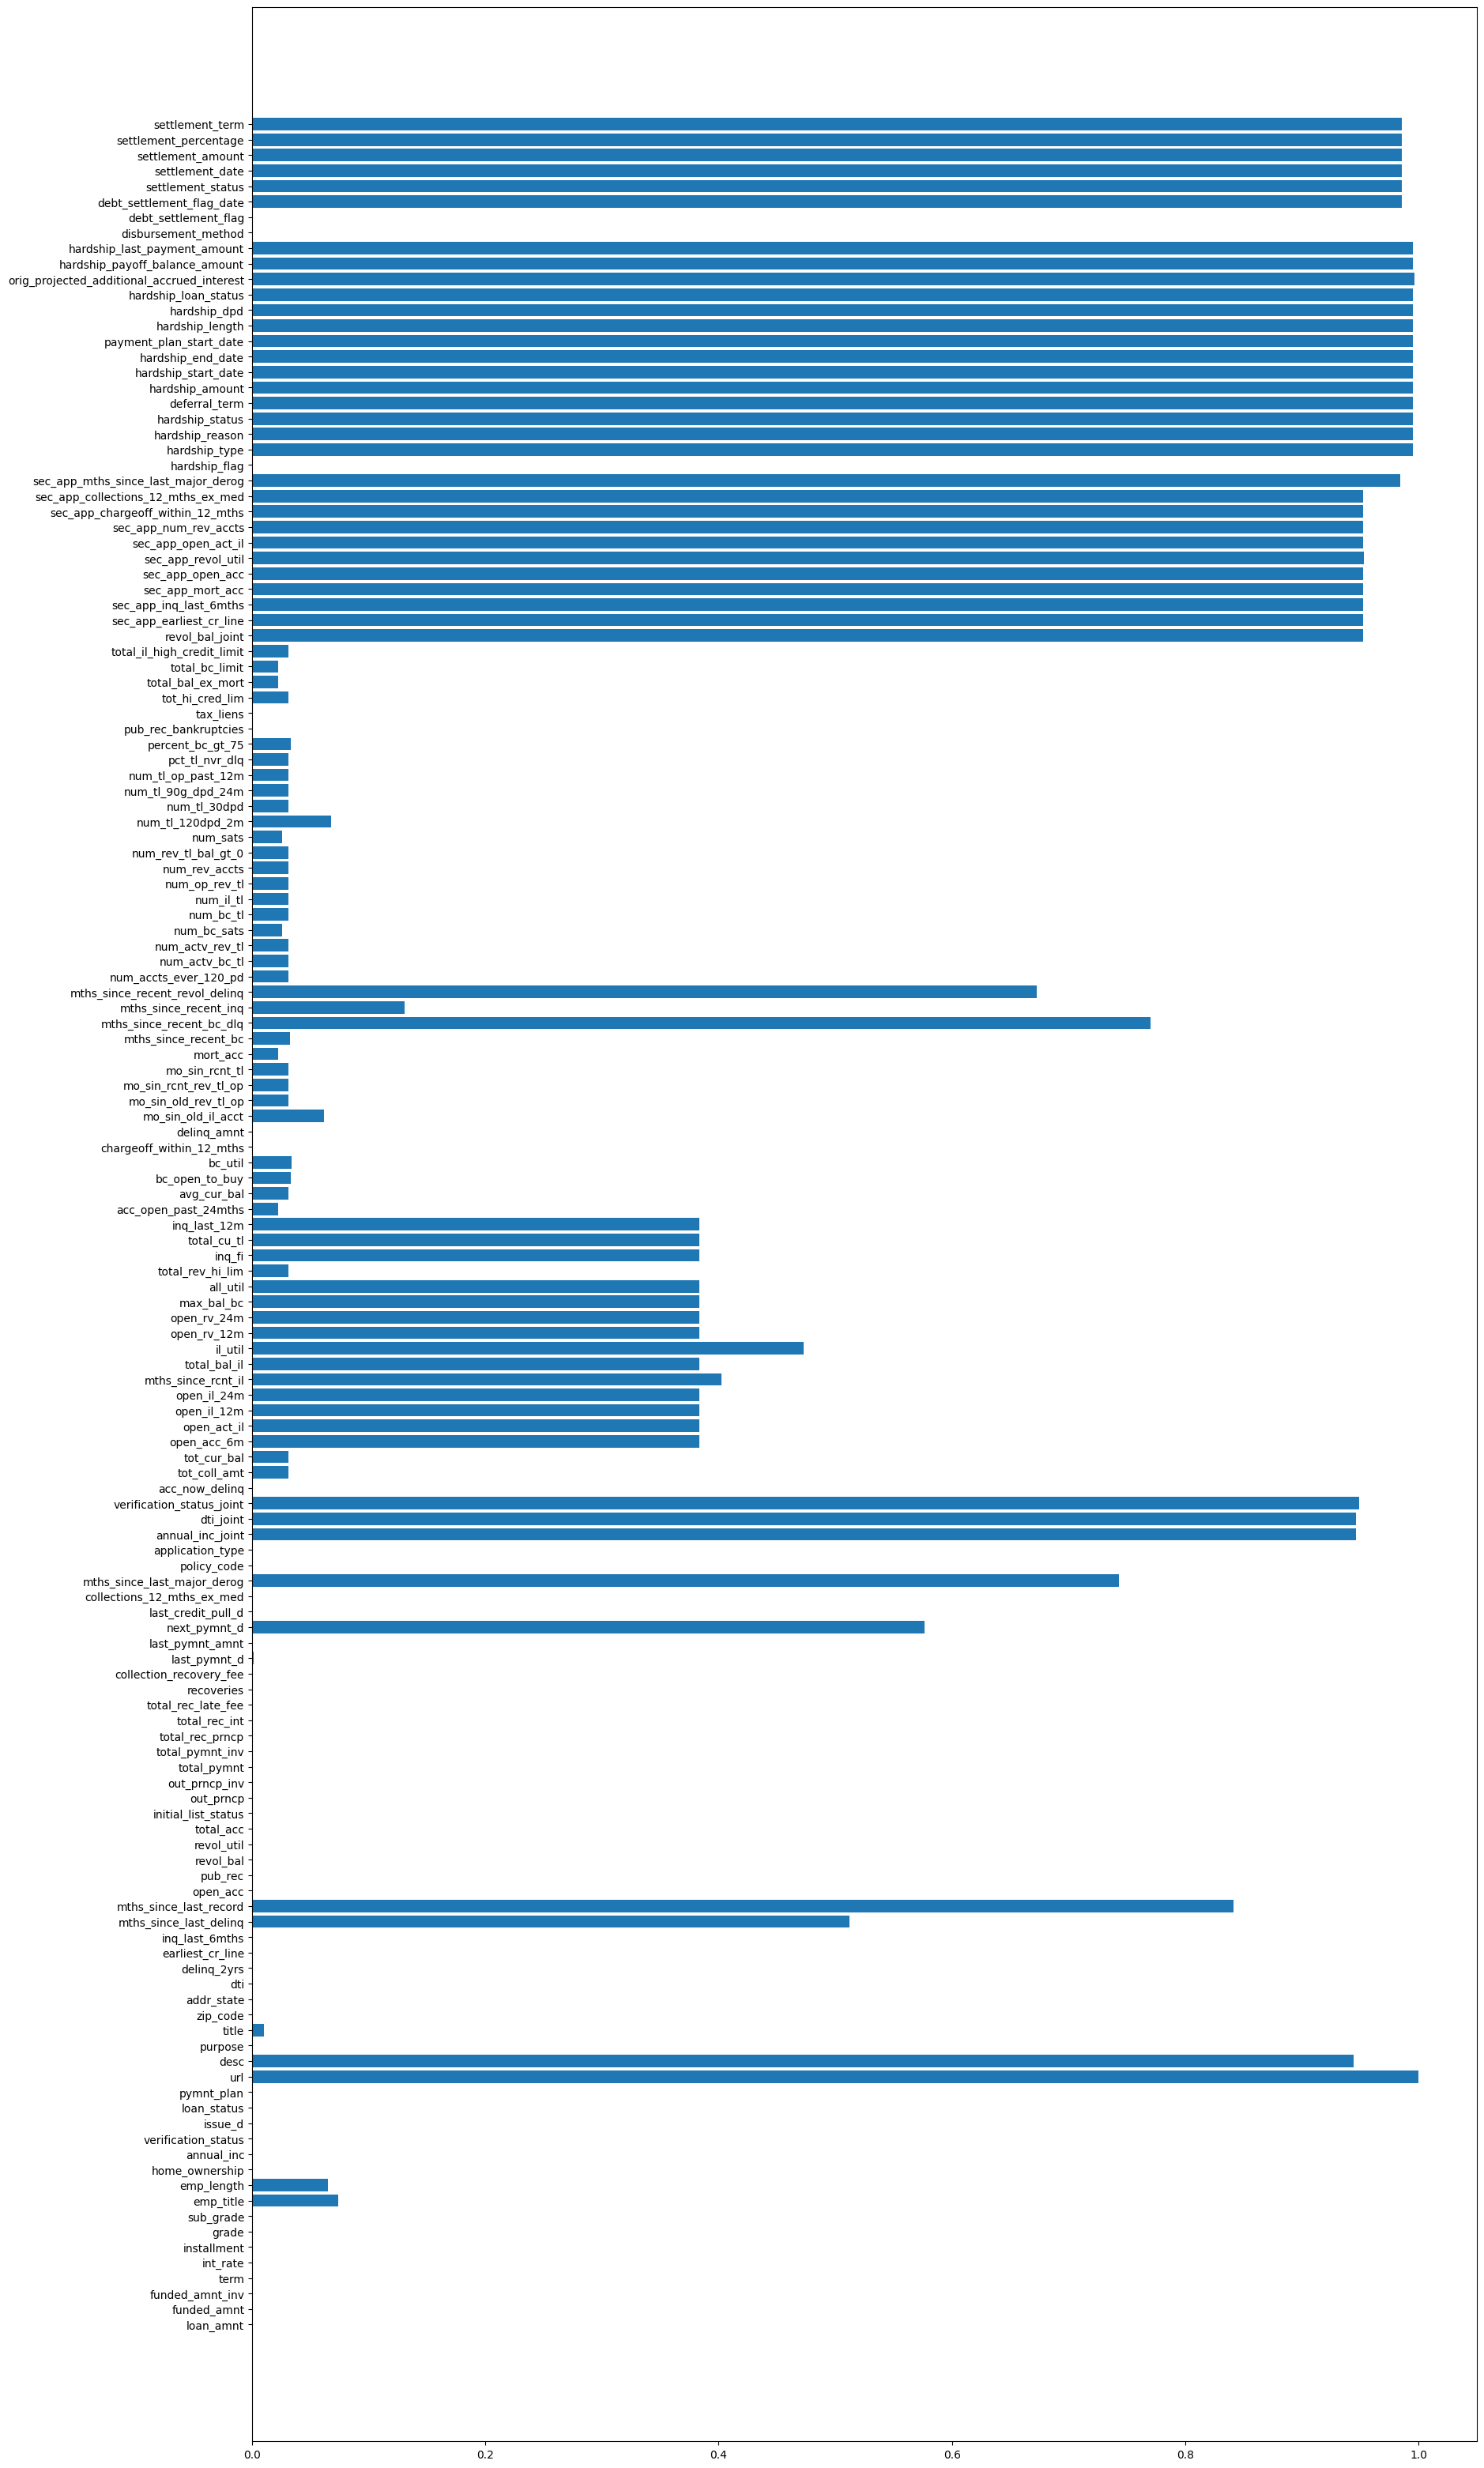

In [39]:
column_names = df.columns
# check for nan rate
from matplotlib import pyplot as plt
plot, ax = plt.subplots(figsize=(20, 40))
ax.barh(column_names, df.isna().sum() / df.shape[0])

In [40]:
# threshold for nan rate
column_threshold = 0.7
row_threshold = 0.0
preprocess.cleanup_df(df, column_threshold, row_threshold)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,...,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,N,Cash,N
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,...,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,N,Cash,N
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,...,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0,N,Cash,N
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,...,100.0,0.0,0.0,385183.0,36151.0,5000.0,44984.0,N,Cash,N
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,...,0.0,0.0,0.0,157548.0,29674.0,9300.0,32332.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260663,12000,12000,12000.0,60 months,14.08,279.72,C,C3,house keeper,10+ years,...,66.7,0.0,0.0,73948.0,45212.0,6200.0,49448.0,N,Cash,N
2260664,12000,12000,12000.0,60 months,25.82,358.01,E,E4,Skilled Labor,< 1 year,...,50.0,0.0,0.0,382275.0,12928.0,11400.0,12125.0,N,Cash,N
2260665,10000,10000,10000.0,36 months,11.99,332.10,B,B5,Teacher,10+ years,...,100.0,0.0,0.0,203417.0,36448.0,2000.0,29317.0,N,Cash,N
2260666,12000,12000,12000.0,60 months,21.45,327.69,D,D5,NaN,NaN,...,0.0,0.0,0.0,118975.0,65238.0,22000.0,81975.0,N,Cash,N


(0.0, 1.0)

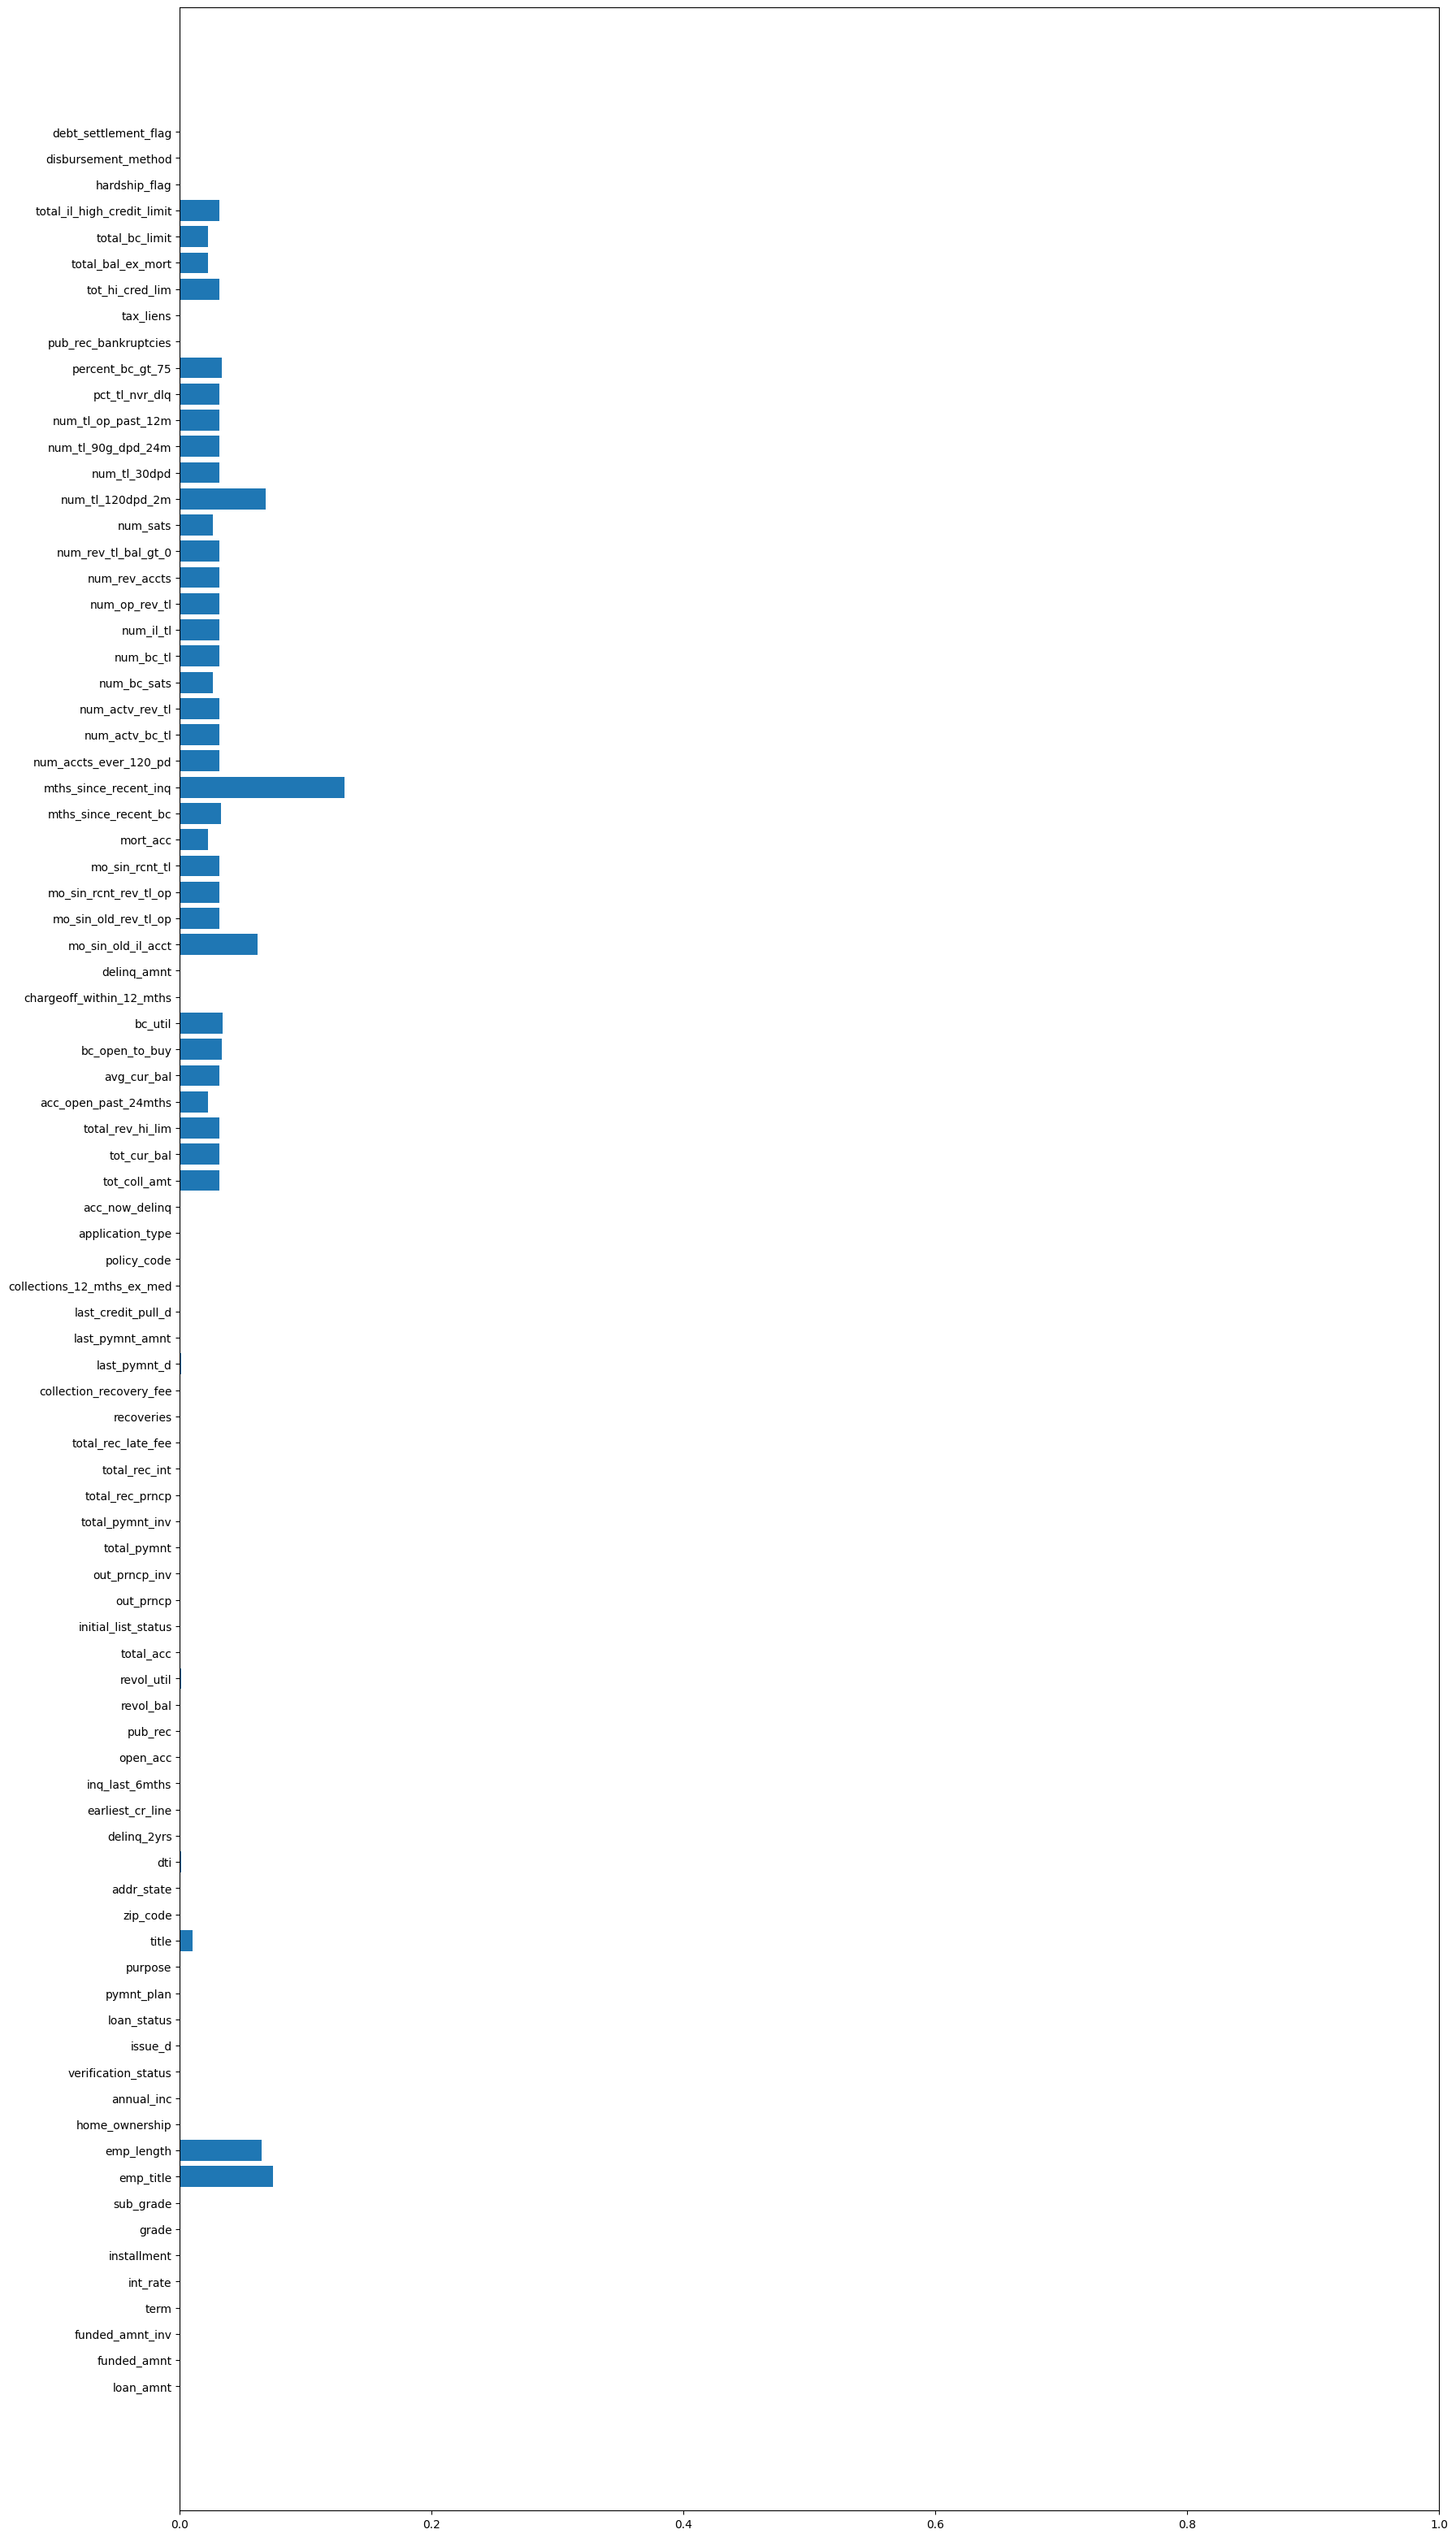

In [41]:
# check for nan rate
plot, ax = plt.subplots(figsize=(20, 40))
ax.barh(df.columns, df.isna().sum() / df.shape[0])
# get x to be 0 - 1
ax.set_xlim(0, 1)


In [63]:
# TODO: hand pick a subset of features to work with
#print(df.columns)
categorical_columns = ['']
numerical_columns = ['']
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,...,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,N,Cash,N
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,...,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,N,Cash,N
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,...,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0,N,Cash,N
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,...,100.0,0.0,0.0,385183.0,36151.0,5000.0,44984.0,N,Cash,N
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,...,0.0,0.0,0.0,157548.0,29674.0,9300.0,32332.0,N,Cash,N


In [ ]:
# cleanup: before and after (nan)
# correlation matrix
# cleanup: correlation matrix
# label distribution
# feature that we selected (category, numerical)
# encoding categorical features, and label encoding + scaling
# sampling if data is imbalaced
# hand select a subset of features for plotting (feature vs label distribution)
# machine learning model (becuase of the imbalance) TODO Tuesday
# evaluation metrics (accuracy, precision, recall, f1, auc)